## Quiz 4: Linear Regression Models on Diabetes Data Set


**Question 1**. Import **numpy**, **matplotlib**, **seaborn**, and other necessary libraries. Also, import  **datasets**, **linear_model**, and **metrics**  from scikit-learn module.

In [19]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

**Question 2**. Load diabetes data from scikit-learn library (**Hint: diabetes = datasets.load_diabetes()**).Note that the type of this dataset is **Bunch**, which is a dictionary like object with keys and values. 
- What are the keys of the diabetes dataset?
- What are the features  of the dataset? 
- Print the data of predictors (features) and the target. 
- Also, print the description of the dataset.

In [20]:
diabetes = datasets.load_diabetes()

In [15]:
print ('Shape of data:', x_diabetes.shape, y_diabetes.shape)

Shape of data: (442, 10) (442,)


In [16]:
print ('Keys:', diabetes.keys())
print ('Feature names:',diabetes.feature_names)
print (diabetes.DESCR)

Keys: dict_keys(['data', 'target', 'DESCR', 'feature_names'])
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://ww

**Question 3**. Select the first 4 columns (i.e. age, sex, bmi, bp) from diabetes dataset (**diabetes.data**) and save the results in a dataset, namely **X_data**. Also, save the target (**diabetes.target**) in a dataset  namely, **y_data**. 
- What are their shape?
- Also, draw a density plot of the **y_data**.



In [41]:
x_data = diabetes.data[:,:4]
y_data = diabetes.target

In [42]:
print("x_data shape: " + str(x_data.shape))
print("y_data shape: " + str(y_data.shape))

x_data shape: (442, 4)
y_data shape: (442,)


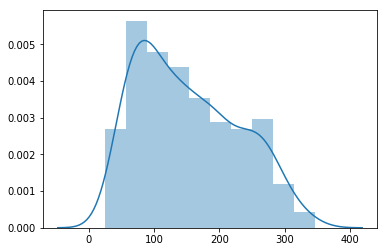

In [43]:
sb.distplot(y_data) 
plt.show()

**Question 4**. Visualize the relationships between the target variable (**y_data**) with each of the four features.

**Hint**:

- plot **y_data** vs **age**
- plot **y_data** vs **sex**
- plot **y_data** vs **bmi**
- plot **y_data** vs **bp**


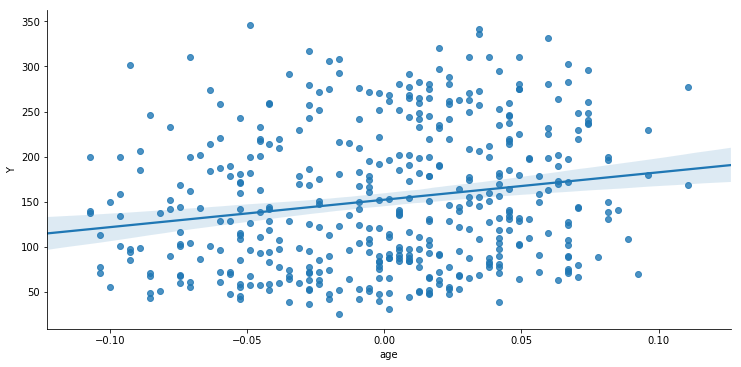

In [44]:
df_diabetes = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df_diabetes['Y'] = diabetes.target
sb.lmplot("age", "Y", df_diabetes, size = 5.2, aspect = 2);
plt.show()

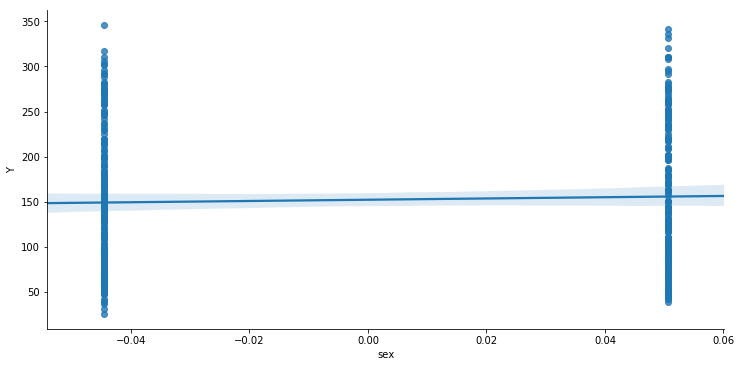

In [45]:
sb.lmplot("sex", "Y", df_diabetes, size = 5.2, aspect = 2);
plt.show()

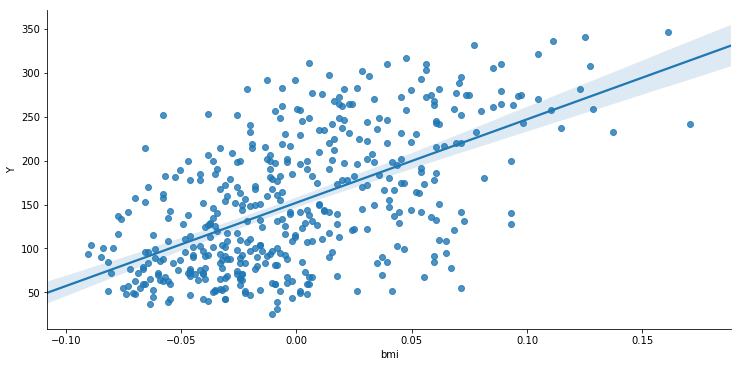

In [46]:
sb.lmplot("bmi", "Y", df_diabetes, size = 5.2, aspect = 2);
plt.show()

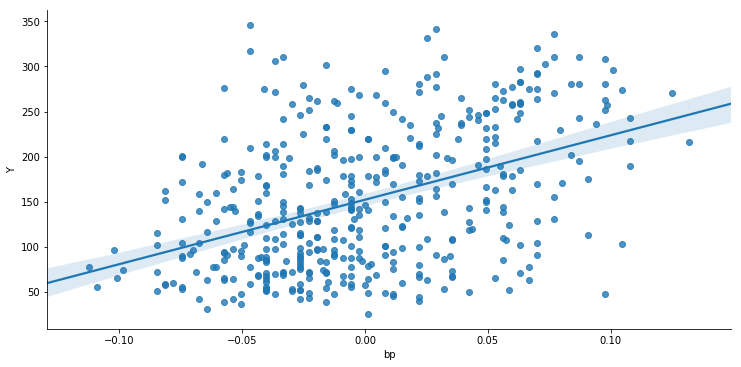

In [47]:
sb.lmplot("bp", "Y", df_diabetes, size = 5.2, aspect = 2);
plt.show()

**Question 5**. Create a training set and a test set by spliting 85% of the data into training set and 15% data into test set.

**Hint:** For 75% and 25% split, we can use the following code.

**from sklearn.model_selection import train_test_split**

**X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.25, random_state = 50)**


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size= 0.15, random_state = 50)
print(x_train.shape)
print(x_test.shape)

(375, 4)
(67, 4)


**Question 6**. Create and fit the following two linear models. Display the coefficients and intercepts of each of the models. 
1. **lm1** with only **bmi** feature.
2. **lm2** with all four features **(age, sex, bmi, bp)**


In [84]:
lm1_x = x_train[:,2].reshape(-1,1)
lm1_y = y_train

lm1 = LinearRegression()
lm1.fit(lm1_x, lm1_y)
lm1_y_hat = lm1.predict(lm1_x)

print ("Coefficients:", lm1.coef_)
print ("Intercept:", lm1.intercept_)

Coefficients: [940.41904581]
Intercept: 153.65154197275302


In [86]:
lm2_x = x_train
lm2_y = y_train

lm2 = LinearRegression()
lm2.fit(lm2_x, lm2_y)
lm2_y_hat = lm2.predict(lm2_x)

print ("Coefficients:", lm2.coef_)
print ("Intercept:", lm2.intercept_)

Coefficients: [  58.64415665 -105.01611865  772.24308963  427.96666872]
Intercept: 152.9971569128957


**Question 7**. Find $R^2$ and MSE in both training and test sets using **lm1** model. Predict **Disease progression** on the test set using **lm1** model. Give some kind of visualization of the model performance. 

In [89]:
print ("MSE:", metrics.mean_squared_error(lm1_y_hat, lm1_y))
print ("R^2:", metrics.r2_score(lm1_y, lm1_y_hat))

MSE: 4013.7922158730976
R^2: 0.33376412032296776


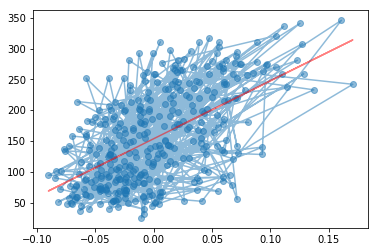

In [97]:
plt.figure()
plt.plot(lm1_x, lm1_y,'-o', alpha = 0.5)
plt.plot(lm1_x, lm1_y_hat, 'r', alpha = 0.5)

In [101]:
test1_x = x_test[:,2].reshape(-1,1)
test1_y = y_test

lm_test1 = LinearRegression()
lm_test1.fit(test1_x, test1_y)
lm_test1_y_hat = lm_test1.predict(test1_x)

print ("MSE:", metrics.mean_squared_error(lm_test1_y_hat, test1_y))
print ("R^2:", metrics.r2_score(test1_y, lm_test1_y_hat))

MSE: 3113.5513631738327
R^2: 0.3978638698520366


**Question 8**. Find $R^2$ and MSE in both sets using **lm2** model. Predict **Disease progression** on test set using **lm2**.  Is this a better model as compared to previous one? 

In [91]:
print ("MSE:", metrics.mean_squared_error(lm2_y_hat, lm2_y))
print ("R^2:", metrics.r2_score(lm2_y, lm2_y_hat))

MSE: 3645.24736540021
R^2: 0.39493764138472853


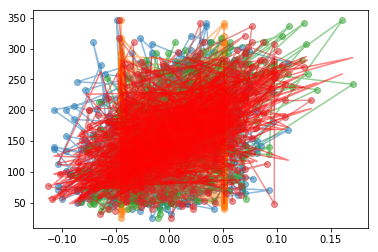

In [94]:
plt.figure()
plt.plot(lm2_x, lm2_y,'-o', alpha = 0.5)
plt.plot(lm2_x, lm2_y_hat, 'r', alpha = 0.5)

In [102]:
test2_x = x_test
test2_y = y_test

lm_test2 = LinearRegression()
lm_test2.fit(test2_x, test2_y)
lm_test2_y_hat = lm_test2.predict(test2_x)

print ("MSE:", metrics.mean_squared_error(lm_test2_y_hat, test2_y))
print ("R^2:", metrics.r2_score(test2_y, lm_test2_y_hat))

MSE: 2946.5161571280873
R^2: 0.43016715341320044
